In [1]:
#imports
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt # for visualizations
from matplotlib.ticker import ScalarFormatter
import seaborn as sns # for visualizations
import numpy as np
import datetime as dt
from numpy import asarray

#model packages
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn import tree
import statsmodels.api as sm #linear regression tool
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from xgboost import XGBRegressor
import pickle

#Pre-processing and metrics
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing #for normalizing values
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

# Spark
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType,StructField, StringType, DoubleType, IntegerType, DateType
import pyspark.sql.functions as f

In [2]:
# Create the spark session and context.
spark = pyspark.sql.SparkSession.builder.getOrCreate()
sc = spark.sparkContext

In [3]:
# Create the schema with the column names, type, and nullable as true or false
schema = StructType([ \
    StructField("index", IntegerType(), True), \
    StructField("MLSNumber", StringType(), True), \
    StructField("DOM", IntegerType(), True), \
    StructField("CDOM", IntegerType(), True), \
    StructField("ListDate", StringType(), True), \
    StructField("AgreementOfSaleSignedLeaseDate", StringType(), True), \
    StructField("OffMarketDate", StringType(), True), \
    StructField("SettledDate", StringType(), True), \
    StructField("OriginalPrice", StringType(), True), \
    StructField("ListPrice", StringType(), True), \
    StructField("SoldPrice", StringType(), True), \
    StructField("StreetNumber", StringType(), True), \
    StructField("StreetDirection", StringType(), True), \
    StructField("StreetName", StringType(), True), \
    StructField("UnitNumber", StringType(), False), \
    StructField("City", StringType(), True), \
    StructField("ZipCode", IntegerType(), True), \
    StructField("County", StringType(), True), \
    StructField("Subdivision", StringType(), True), \
    StructField("ListAgentName", StringType(), True), \
    StructField("ListAgentCode", IntegerType(), True), \
    StructField("ListOfficeName", StringType(), True), \
    StructField("ListOfficeCode", StringType(), True), \
    StructField("SellingAgent", StringType(), True), \
    StructField("SellingAgentCode", StringType(), True), \
    StructField("SellingOfficeName", StringType(), True), \
    StructField("SellingOfficeCode", StringType(), True), \
    StructField("SellerConcessionsAmount", StringType(), True), \
    StructField("FinalFinancing", StringType(), True), \
    StructField("FinalShortSale", StringType(), True), \
    StructField("FinalThirdPartyApproval", StringType(), True), \
    StructField("FinalBankOwned", StringType(), True), \
    StructField("TaxAnnualTotal", StringType(), True), \
    StructField("TaxYear", StringType(), True), \
    StructField("AcresTotal", DoubleType(), True), \
    StructField("LandUseCode", StringType(), True), \
    StructField("Ownership", StringType(), True), \
    StructField("SeniorCommunity", StringType(), False), \
    StructField("CondoCoopAssoc", StringType(), True), \
    StructField("HOA", StringType(), True), \
    StructField("OneTimeAssociationFee", StringType(), True), \
    StructField("AssociationFee", StringType(), True), \
    StructField("AssociationFeeFrequency", StringType(), True), \
    StructField("Age", StringType(), True), \
    StructField("InteriorSqFt", StringType(), True), \
    StructField("PropertyCondition", StringType(), True), \
    StructField("Bedrooms", StringType(), True), \
    StructField("BathsFull", StringType(), True), \
    StructField("BathsHalf", StringType(), True), \
    StructField("Design", StringType(), True), \
    StructField("Style", StringType(), True), \
    StructField("NumberofStories", StringType(), True), \
    StructField("FloorNumber", StringType(), True), \
    StructField("Basement", StringType(), True), \
    StructField("GarageSpaces", StringType(), True), \
    StructField("Fireplace", StringType(), True), \
    StructField("Laundry", StringType(), True), \
    StructField("OtherRooms", StringType(), True), \
    StructField("RoomCount", StringType(), True), \
    StructField("CentralAir", StringType(), True), \
    StructField("Waterfront", StringType(), True), \
    StructField("NewConstruction", StringType(), True), \
    StructField("ModelName", StringType(), True), \
    StructField("BuyerBrokerCompensation", DoubleType(), True), \
    StructField("SubAgentCompensation", DoubleType(), True), \
    StructField("TransactionBrokerCompensation", DoubleType(), True), \
    StructField("OriginatingMLS", StringType(), True), \
    StructField("AboveGradeSqFt", StringType(), True), \
    StructField("BelowGradeSqFt", StringType(), True), \
    StructField("HomeBuilt", StringType(), True), \
    StructField("BasementFootprintPct", StringType(), True), \
    StructField("BasementFinishedPct", StringType(), True)
  ])

In [4]:
# Read in the cleaned data
df = spark.read.csv("../CleanedData/cleaned_data.csv", sep=",", schema=schema, header=True)

In [5]:
# Convert the columns that came in as strings using dollars to integers
df = df.withColumn('OriginalPrice', f.regexp_replace('OriginalPrice', '[$,]', '').cast('integer'))
df = df.withColumn('ListPrice', f.regexp_replace('ListPrice', '[$,]', '').cast('integer'))
df = df.withColumn('SoldPrice', f.regexp_replace('SoldPrice', '[$,]', '').cast('integer'))
df = df.withColumn('SellerConcessionsAmount', f.regexp_replace('SellerConcessionsAmount', '[$,]', '').cast('integer'))
df = df.withColumn('StreetNumber', df['StreetNumber'].cast('integer'))
df = df.withColumn('UnitNumber', df['UnitNumber'].cast('integer'))
df = df.withColumn('SellingAgentCode', df['SellingAgentCode'].cast('integer'))
df = df.withColumn('TaxAnnualTotal', df['TaxAnnualTotal'].cast('integer'))
df = df.withColumn('TaxYear', df['TaxYear'].cast('integer'))
df = df.withColumn('LandUseCode', df['LandUseCode'].cast('integer'))
df = df.withColumn('AssociationFee', df['AssociationFee'].cast('integer'))
df = df.withColumn('Age', df['Age'].cast('integer'))
df = df.withColumn('InteriorSqFt', df['InteriorSqFt'].cast('integer'))
df = df.withColumn('Bedrooms', df['Bedrooms'].cast('integer'))
df = df.withColumn('BathsFull', df['BathsFull'].cast('integer'))
df = df.withColumn('BathsHalf', df['BathsHalf'].cast('integer'))
df = df.withColumn('GarageSpaces', df['GarageSpaces'].cast('integer'))
df = df.withColumn('RoomCount', df['RoomCount'].cast('integer'))
df = df.withColumn('AboveGradeSqFt', df['AboveGradeSqFt'].cast('integer'))
df = df.withColumn('BelowGradeSqFt', df['BelowGradeSqFt'].cast('integer'))
df = df.withColumn('BasementFootprintPct', df['BasementFootprintPct'].cast('integer'))
df = df.withColumn('BasementFinishedPct', df['BasementFinishedPct'].cast('integer'))


In [6]:
# Verify the count
df.count()

90758

In [7]:
# Cache the dataframe
dfCache = df.cache()

In [8]:
# Convert to pandas dataframe
dfpdForLinearRegression = dfCache.toPandas()

In [9]:
# Function to one-hot-encode the columnToEncode within the dfToEncode and return the new dataframe
def oneHotEncode(dfToEncode, columnToEncode):
    # Get one hot encoding of columns provided
    one_hot = pd.get_dummies(dfToEncode[columnToEncode])
    # Drop column provided as it is now encoded
    dfToEncode = dfToEncode.drop(columnToEncode, axis = 1)
    # Join the encoded df
    return dfToEncode.join(one_hot)

In [10]:
# First step will be to clean the categorical data into usable fields for regression - needs to be quantitative

dfpdForLinearRegression = dfpdForLinearRegression[['SoldPrice', 'SettledDate', 'ZipCode', 'County', 'AcresTotal', 
                                                   'Age', 'InteriorSqFt', 'Bedrooms', 
                                                   'BathsFull', 'BathsHalf', 'Style', 'Basement', 'GarageSpaces', 
                                                   'Fireplace', 'CentralAir', 'Waterfront', 'NewConstruction']]

dfpdForLinearRegression['SettledDate'] = pd.to_datetime(dfpdForLinearRegression['SettledDate'])
dfpdForLinearRegression['SettledDate'] = dfpdForLinearRegression['SettledDate'].map(dt.datetime.toordinal)

dfpdForLinearRegression = oneHotEncode(dfpdForLinearRegression, 'County')
dfpdForLinearRegression = oneHotEncode(dfpdForLinearRegression, 'Style')

# Get one hot encoding of columns Basement
one_hot = pd.get_dummies(dfpdForLinearRegression['Basement'])
one_hot.rename(columns = {'No':'NoBasement', 'Yes':'HasBasement'}, inplace = True)
# Drop column Basement as it is now encoded
dfpdForLinearRegression = dfpdForLinearRegression.drop('Basement', axis = 1)
# Join the encoded df
dfpdForLinearRegression = dfpdForLinearRegression.join(one_hot)

# Get one hot encoding of columns Fireplace
one_hot = pd.get_dummies(dfpdForLinearRegression['Fireplace'])
one_hot.rename(columns = {'No':'NoFireplace', 'Yes':'HasFireplace'}, inplace = True)
# Drop column Fireplace as it is now encoded
dfpdForLinearRegression = dfpdForLinearRegression.drop('Fireplace', axis = 1)
# Join the encoded df
dfpdForLinearRegression = dfpdForLinearRegression.join(one_hot)

# Get one hot encoding of columns CentralAir
one_hot = pd.get_dummies(dfpdForLinearRegression['CentralAir'])
one_hot.rename(columns = {'No':'NoCentralAir', 'Yes':'HasCentralAir'}, inplace = True)
# Drop column CentralAir as it is now encoded
dfpdForLinearRegression = dfpdForLinearRegression.drop('CentralAir', axis = 1)
# Join the encoded df
dfpdForLinearRegression = dfpdForLinearRegression.join(one_hot)

# Get one hot encoding of columns Waterfront
one_hot = pd.get_dummies(dfpdForLinearRegression['Waterfront'])
one_hot.rename(columns = {'No':'NotWaterfront', 'Yes':'IsWaterfront'}, inplace = True)
# Drop column Waterfront as it is now encoded
dfpdForLinearRegression = dfpdForLinearRegression.drop('Waterfront', axis = 1)
# Join the encoded df
dfpdForLinearRegression = dfpdForLinearRegression.join(one_hot)

# Get one hot encoding of columns NewConstruction
one_hot = pd.get_dummies(dfpdForLinearRegression['NewConstruction'])
one_hot.rename(columns = {'No':'NotNewConstruction', 'Yes':'IsNewConstruction'}, inplace = True)
# Drop column NewConstruction as it is now encoded
dfpdForLinearRegression = dfpdForLinearRegression.drop('NewConstruction', axis = 1)
# Join the encoded df
dfpdForLinearRegression = dfpdForLinearRegression.join(one_hot)

# fill these missing values with 0s - we'll say if they were missing, they were 0
dfpdForLinearRegression["BathsHalf"].fillna(0, inplace = True)
dfpdForLinearRegression["BathsFull"].fillna(0, inplace = True)
dfpdForLinearRegression["Bedrooms"].fillna(0, inplace = True)
dfpdForLinearRegression["AcresTotal"].fillna(0, inplace = True)
dfpdForLinearRegression["Bedrooms"].fillna(0, inplace = True)
dfpdForLinearRegression["GarageSpaces"].fillna(0, inplace = True)

# if anything else is missing, just drop that row
dfpdForLinearRegression = dfpdForLinearRegression.dropna()


In [11]:
# Now do the same thing, except without style since it seems to be insignificant

dfpdForLinearRegressionNoStyle = dfCache.toPandas()

dfpdForLinearRegressionNoStyle = dfpdForLinearRegressionNoStyle[['SoldPrice', 'SettledDate', 'ZipCode', 'County', 
                                                    'AcresTotal', 'Age', 'InteriorSqFt', 'Bedrooms', 
                                                   'BathsFull', 'BathsHalf', 'Basement', 'GarageSpaces', 
                                                   'Fireplace', 'CentralAir', 'Waterfront', 'NewConstruction']]

dfpdForLinearRegressionNoStyle['SettledDate'] = pd.to_datetime(dfpdForLinearRegressionNoStyle['SettledDate'])
dfpdForLinearRegressionNoStyle['SettledDate'] = dfpdForLinearRegressionNoStyle['SettledDate'].map(dt.datetime.toordinal)

dfpdForLinearRegressionNoStyle = oneHotEncode(dfpdForLinearRegressionNoStyle, 'County')

# Get one hot encoding of columns Basement
one_hot = pd.get_dummies(dfpdForLinearRegressionNoStyle['Basement'])
one_hot.rename(columns = {'No':'NoBasement', 'Yes':'HasBasement'}, inplace = True)
# Drop column Basement as it is now encoded
dfpdForLinearRegressionNoStyle = dfpdForLinearRegressionNoStyle.drop('Basement', axis = 1)
# Join the encoded df
dfpdForLinearRegressionNoStyle = dfpdForLinearRegressionNoStyle.join(one_hot)

# Get one hot encoding of columns Fireplace
one_hot = pd.get_dummies(dfpdForLinearRegressionNoStyle['Fireplace'])
one_hot.rename(columns = {'No':'NoFireplace', 'Yes':'HasFireplace'}, inplace = True)
# Drop column Fireplace as it is now encoded
dfpdForLinearRegressionNoStyle = dfpdForLinearRegressionNoStyle.drop('Fireplace', axis = 1)
# Join the encoded df
dfpdForLinearRegressionNoStyle = dfpdForLinearRegressionNoStyle.join(one_hot)

# Get one hot encoding of columns CentralAir
one_hot = pd.get_dummies(dfpdForLinearRegressionNoStyle['CentralAir'])
one_hot.rename(columns = {'No':'NoCentralAir', 'Yes':'HasCentralAir'}, inplace = True)
# Drop column CentralAir as it is now encoded
dfpdForLinearRegressionNoStyle = dfpdForLinearRegressionNoStyle.drop('CentralAir', axis = 1)
# Join the encoded df
dfpdForLinearRegressionNoStyle = dfpdForLinearRegressionNoStyle.join(one_hot)

# Get one hot encoding of columns Waterfront
one_hot = pd.get_dummies(dfpdForLinearRegressionNoStyle['Waterfront'])
one_hot.rename(columns = {'No':'NotWaterfront', 'Yes':'IsWaterfront'}, inplace = True)
# Drop column Waterfront as it is now encoded
dfpdForLinearRegressionNoStyle = dfpdForLinearRegressionNoStyle.drop('Waterfront', axis = 1)
# Join the encoded df
dfpdForLinearRegressionNoStyle = dfpdForLinearRegressionNoStyle.join(one_hot)

# Get one hot encoding of columns NewConstruction
one_hot = pd.get_dummies(dfpdForLinearRegressionNoStyle['NewConstruction'])
one_hot.rename(columns = {'No':'NotNewConstruction', 'Yes':'IsNewConstruction'}, inplace = True)
# Drop column NewConstruction as it is now encoded
dfpdForLinearRegressionNoStyle = dfpdForLinearRegressionNoStyle.drop('NewConstruction', axis = 1)
# Join the encoded df
dfpdForLinearRegressionNoStyle = dfpdForLinearRegressionNoStyle.join(one_hot)

# fill these missing values with 0s - we'll say if they were missing, they were 0
dfpdForLinearRegressionNoStyle["BathsHalf"].fillna(0, inplace = True)
dfpdForLinearRegressionNoStyle["BathsFull"].fillna(0, inplace = True)
dfpdForLinearRegressionNoStyle["Bedrooms"].fillna(0, inplace = True)
dfpdForLinearRegressionNoStyle["AcresTotal"].fillna(0, inplace = True)
dfpdForLinearRegressionNoStyle["Bedrooms"].fillna(0, inplace = True)
dfpdForLinearRegressionNoStyle["GarageSpaces"].fillna(0, inplace = True)

# if anything else is missing, just drop that row
dfpdForLinearRegressionNoStyle = dfpdForLinearRegressionNoStyle.dropna()



In [12]:
# get the train / test split from the df for linear regression
X_train, X_test = train_test_split(dfpdForLinearRegression, test_size = 0.2, random_state = 2) # splits the data into two parts with 1:4 ratio
print(X_train.shape)
print(X_test.shape)

(61000, 686)
(15251, 686)


In [14]:
#set the training and testing data
X = X_train.drop('SoldPrice', axis = 1)
y = X_train.SoldPrice
X = sm.add_constant(X) #add the constant to the model
mod = sm.OLS(y, X, hasconst= True) #create the ordinary least squares model
res = mod.fit() #fit the model
print(res.summary()) #summarize the model

                            OLS Regression Results                            
Dep. Variable:              SoldPrice   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     183.0
Date:                Sun, 22 May 2022   Prob (F-statistic):               0.00
Time:                        20:38:07   Log-Likelihood:            -8.2336e+05
No. Observations:               61000   AIC:                         1.648e+06
Df Residuals:                   60417   BIC:                         1.653e+06
Df Model:                         582                                         
Covariance Type:            nonrobust                                         
                                                                                                                                                                                                                  

Looking at the results here, many of the styles are statistically insignificant and don't add that much to the model.  There are also a lot of them and it creates for a lot of variables in the model after one-hot-encoding.  For these reasons, I will try without them.

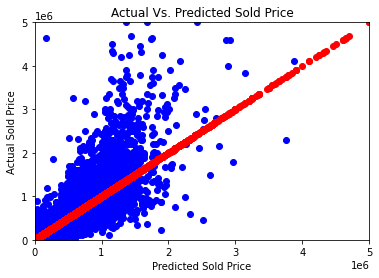

In [15]:
# Scatter plot of the actual vs predicted sold prices
plt.scatter(res.predict(X), y, color = 'blue')
plt.scatter(y, y, color = 'red')
plt.title('Actual Vs. Predicted Sold Price')
plt.xlim(0, 5000000)
plt.ylim(0, 5000000)
plt.xlabel('Predicted Sold Price')
plt.ylabel('Actual Sold Price')
plt.show()

#plot.scatter(xTrain, yTrain, color = 'red')
#plot.plot(xTrain, linearRegressor.predict(xTrain), color = 'blue')
#plot.title('Salary vs Experience (Training set)')
#plot.xlabel('Years of Experience')
#plot.ylabel('Salary')
#plot.show()

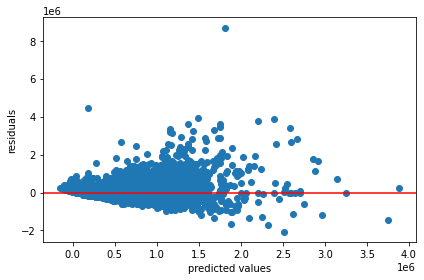

In [16]:
# plot the residuals
residuals = res.resid

y_pred = res.predict(X)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color = 'red', label = '0')

plt.xlabel('predicted values')
plt.ylabel('residuals')
plt.tight_layout()

In [17]:
# Now repeat for the data, this time without the styling in there
X_train, X_test = train_test_split(dfpdForLinearRegressionNoStyle, test_size = 0.2, random_state = 2) # splits the data into two parts with 1:4 ratio
print(X_train.shape)
print(X_test.shape)

(61000, 24)
(15251, 24)


In [18]:
#set the training and testing data
X = X_train.drop('SoldPrice', axis = 1)
y = X_train.SoldPrice
X = sm.add_constant(X) #add the constant to the model
mod = sm.OLS(y, X, hasconst= True) #create the ordinary least squares model
res = mod.fit() #fit the model
print(res.summary()) #summarize the model

                            OLS Regression Results                            
Dep. Variable:              SoldPrice   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     5267.
Date:                Sun, 22 May 2022   Prob (F-statistic):               0.00
Time:                        20:38:32   Log-Likelihood:            -8.2575e+05
No. Observations:               61000   AIC:                         1.652e+06
Df Residuals:                   60981   BIC:                         1.652e+06
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.794e+07   3.64

These results are slightly better, with all of the variables involved in the model now statistically significant.

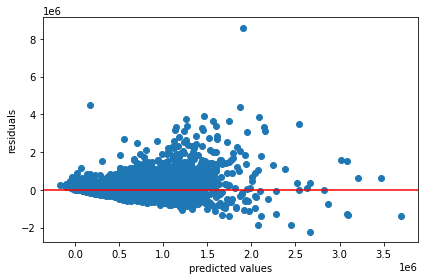

In [19]:
#plot the residuals
residuals = res.resid

y_pred = res.predict(X)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color = 'red', label = '0')

plt.xlabel('predicted values')
plt.ylabel('residuals')
plt.tight_layout()

In [20]:
# Now try with normalized scaling

x = dfpdForLinearRegressionNoStyle.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dfpdForLinearRegressionNoStyleScaled = pd.DataFrame(x_scaled, columns=dfpdForLinearRegressionNoStyle.columns)

In [21]:
# Get the train / test split for the scaled data
X_train, X_test = train_test_split(dfpdForLinearRegressionNoStyleScaled, test_size = 0.2, random_state = 2) # splits the data into two parts with 1:4 ratio
print(X_train.shape)
print(X_test.shape)

(61000, 24)
(15251, 24)


In [22]:
# set the training and testing data
X = X_train.drop('SoldPrice', axis = 1)
y = X_train.SoldPrice
X = sm.add_constant(X) #add the constant to the model
mod = sm.OLS(y, X, hasconst= True) #create the ordinary least squares model
res = mod.fit() #fit the model
print(res.summary()) #summarize the model

                            OLS Regression Results                            
Dep. Variable:              SoldPrice   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     5267.
Date:                Sun, 22 May 2022   Prob (F-statistic):               0.00
Time:                        20:38:47   Log-Likelihood:             1.6326e+05
No. Observations:               61000   AIC:                        -3.265e+05
Df Residuals:                   60981   BIC:                        -3.263e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0038      0

This contains the same statistic results as the non scaled data did.

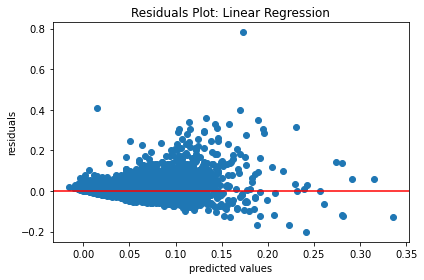

In [23]:
#plot the residuals
residuals = res.resid

y_pred = res.predict(X)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color = 'red', label = '0')

plt.xlabel('predicted values')
plt.ylabel('residuals')
plt.title('Residuals Plot: Linear Regression')
plt.tight_layout()
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.ticklabel_format(useOffset=False, style='plain')
plt.savefig("../Images/linearRegressionResiduals.png",bbox_inches='tight')

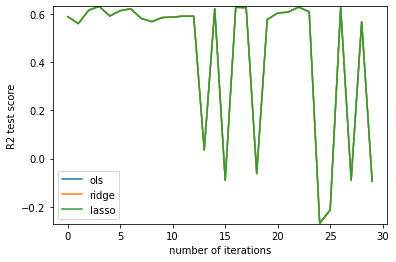

In [24]:

def model_experiment(num_iter = 5, 
                     models = ['ols', 'ridge', 'lasso'], alpha= 10, 
                     complexity = 'simple', degree = 3):
    
    X_train, X_test = train_test_split(dfpdForLinearRegressionNoStyle, test_size = 0.2) # splits the data into two parts with 1:4 ratio
    X = X_train.drop('SoldPrice', axis = 1)
    y = X_train.SoldPrice
    
    x_axis = np.arange(num_iter)
    y_ols_test = []
    y_lasso_test = []
    y_ridge_test = []
    sample_models = {}
    for i in range(num_iter):
        
        if complexity == 'simple':
            ## split train_test 
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
        elif complexity == 'polynomial':
            ## Create higher order terms
            poly = PolynomialFeatures(degree=degree)
            Xp = poly.fit_transform(X)
            ## test-train split
            X_train, X_test, y_train, y_test = train_test_split(Xp, y, test_size = 0.2)


        ## Standard scale mean = 0, variance = 1
        #sd = StandardScaler()

        #sd.fit(X_train)

        #X_train = sd.transform(X_train)

        #X_test = sd.transform(X_test)

        ## Be careful about the leakage

        ## Vanilla model
        if 'ols' in models:
            lr = LinearRegression()

            lr.fit(X_train, y_train)
            
            sample_models['ols'] = lr

            test_score = lr.score(X_test, y_test)
            train_score = lr.score(X_train, y_train)

            y_ols_test.append(test_score)

    #       print('test score OLS is %.2f and train score is %.2f'%(test_score, train_score))

        if 'ridge' in models:
            ## Ridge in the simple setting
            ridge = Ridge(alpha = alpha, max_iter= 10000)
            ridge.fit(X_train, y_train)
            sample_models['ridge'] = ridge
            y_ridge_test.append(ridge.score(X_test, y_test))
    #         print('test score Ridge is %.2f and train score is %.2f'%(ridge.score(X_test, y_test),
    #                                                             ridge.score(X_train, y_train)))

        if 'lasso' in models:
            ## Lasso in the simple setting
            lasso = Lasso(alpha = alpha, max_iter= 10000)

            lasso.fit(X_train, y_train)
            
            sample_models['lasso'] = lasso
            
            y_lasso_test.append(lasso.score(X_test, y_test))
    #       print('test score Lasso is %.2f and train score is %.2f'%(lasso.score(X_test, y_test),
    #                                                             lasso.score(X_train, y_train)))

        i+=1
    if 'ols' in models:
        plt.plot(y_ols_test, label = 'ols')
    if 'ridge' in models:
        plt.plot(y_ridge_test, label = 'ridge')
    if 'lasso' in models:
        plt.plot(y_lasso_test, label = 'lasso')
    plt.ylabel('R2 test score')
    plt.xlabel('number of iterations')
    all_results = y_ols_test + y_lasso_test + y_ridge_test
    plt.ylim((np.min(all_results), np.max(all_results)))
    
    plt.legend()
    plt.savefig("../Images/regressionComparison.png",bbox_inches='tight')
    return sample_models

trained_models = model_experiment(num_iter=30, alpha = 30,
                                   models = ['ols', 'ridge', 'lasso'], 
                                   complexity= 'simple', degree = 3)



In [25]:
# After run model_experiment with complexity == 'polynomial'

lr_ols = trained_models['ols']
lr_lasso = trained_models['lasso']
lr_ridge =trained_models['ridge']

# check the coefficients from Lasso

print(lr_ols.coef_)
print(lr_ridge.coef_)
print(lr_lasso.coef_)

# compare them with OLS/Ridge models.

[ 7.66285923e+01  1.21480721e+02  1.69247951e+04 -5.16394056e+01
  8.73248495e+00  1.15235448e+04  1.20306239e+05  9.08953305e+04
  3.26067814e+04  5.20446039e+04 -4.76865277e+04 -7.19491841e+04
  6.75911080e+04  8.74219413e+01 -8.74219413e+01  5.87563406e+00
  4.89678543e+04 -8.12416784e+03  8.12416784e+03 -2.20515845e+05
  2.20515845e+05 -3.61856770e+04  3.61856770e+04]
[ 7.65813813e+01  1.21553889e+02  1.69242596e+04 -5.16897990e+01
  8.75185754e+00  1.15536065e+04  1.20280767e+05  9.07058236e+04
  3.26742505e+04  5.21266162e+04 -4.76240857e+04 -7.16997827e+04
  6.71972522e+04  1.58638302e+02 -1.58638302e+02 -1.10216437e+02
  4.89098709e+04 -8.07091630e+03  8.07091630e+03 -2.18357785e+05
  2.18357785e+05 -3.59496219e+04  3.59496219e+04]
[ 7.66048344e+01  1.21386789e+02  1.69182278e+04 -5.16187646e+01
  8.74249550e+00  1.15016489e+04  1.20336230e+05  9.08337465e+04
  3.26357929e+04  6.50343804e+04 -3.46012134e+04 -5.87393442e+04
  8.03799242e+04  0.00000000e+00 -0.00000000e+00 -0.000

In [26]:
X_train, X_test = train_test_split(dfpdForLinearRegressionNoStyle, test_size = 0.2) # splits the data into two parts with 1:4 ratio
X = X_train.drop('SoldPrice', axis = 1)
y = X_train.SoldPrice

## Create higher order terms
poly = PolynomialFeatures(degree=3)
Xp = poly.fit_transform(X)
## test-train split
X_train, X_test, y_train, y_test = train_test_split(Xp, y, test_size = 0.2)

print(X_train.shape)
print(X_test.shape)

(48800, 2600)
(12200, 2600)


In [27]:
#set the training and testing data
lr = LinearRegression()
lr.fit(X_train, y_train)
test_score = lr.score(X_test, y_test)
train_score = lr.score(X_train, y_train)

test_score

-1.3039876126674992

Tried here above with polynomial regression but didn't get the best results.

In [28]:
# Now for trying with Support Vector Regression
# Support Vector Regression takes longer to train, so I first take a sample of the data for testing purposes
# of making training faster.  Turns out, using all the data doesn't reammly make the model better anyway.
sample = dfpdForLinearRegressionNoStyle.sample(frac=0.1, replace=False, random_state=1)

X_train, X_test = train_test_split(sample, test_size = 0.2, random_state = 2) # splits the data into two parts with 1:4 ratio
print(X_train.shape)
print(X_test.shape)

(6100, 24)
(1525, 24)


In [29]:
# Show the whole df to ensure it looks correct.
pd.set_option('display.max_columns', None)
X_train.head()

,SoldPrice,SettledDate,ZipCode,AcresTotal,Age,InteriorSqFt,Bedrooms,BathsFull,BathsHalf,GarageSpaces,ANNEARUNDELMD,BALTIMOREMD,HARFORDMD,HOWARDMD,NoBasement,HasBasement,NoFireplace,HasFireplace,NoCentralAir,HasCentralAir,NotWaterfront,IsWaterfront,NotNewConstruction,IsNewConstruction
9511,514550,737455,21108,0.00,2020.0,3571.0,4.0,2.0,1.0,3.0,1,0,0,0,0,1,1,0,0,1,1,0,0,1
1609,300000,737854,21206,0.19,1954.0,1492.0,3.0,2.0,0.0,2.0,0,1,0,0,0,1,0,1,0,1,1,0,1,0
29299,292650,736853,21061,0.17,1976.0,1608.0,4.0,2.0,0.0,0.0,1,0,0,0,0,1,0,1,0,1,1,0,1,0
29194,220000,736867,21037,0.24,1968.0,960.0,3.0,1.0,0.0,0.0,1,0,0,0,1,0,1,0,1,0,1,0,1,0
11006,425000,737633,21090,0.23,1976.0,1944.0,4.0,2.0,2.0,1.0,1,0,0,0,0,1,0,1,0,1,1,0,1,0


In [30]:
# Now try SVR
X = X_train.drop('SoldPrice', axis = 1)
y = X_train.SoldPrice
y = np.asarray(y)
y = y.reshape(-1,1)

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

regressor = SVR(kernel = 'rbf', C = 100, gamma = .001).fit(X, y)
print(regressor)

score = regressor.score(X, y)
print(score)

#print(X[1])

data = [[738124, 21144, 1.61, 1995.0, 3806.0, 5.0, 2.0, 1.0, 2.0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0]]
sc_Xpred = StandardScaler()
Xpred = sc_Xpred.fit_transform(data)
data2 = [[737928, 21784, 6.00, 1996.0, 4428.0, 4.0, 2.0, 1.0, 4.0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0]]
sc_Xpred2 = StandardScaler()
Xpred2 = sc_Xpred2.fit_transform(data2)
#data = sc_X.fit_transform(data)


y_pred = regressor.predict(Xpred)
y_pred = sc_y.inverse_transform(y_pred)
print(y_pred)

y_pred2 = regressor.predict(Xpred2)
y_pred2 = sc_y.inverse_transform(y_pred2)
print(y_pred2)

#Xshaped = np.array(X).reshape(-1,1)
#print(len(X))
#print(len(y))

#plt.scatter(X, y, s=5, color="blue", label="original")
#plt.legend()
#plt.show()

#X_grid = np.arange(np.min(X), np.max(X), 0.01) #this step required because data is feature scaled.
#X_grid = X_grid.reshape((len(X_grid), 1))
#plt.scatter(X, y, color = 'red')
#plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
#plt.title('Truth or Bluff (SVR)')
#plt.xlabel('Position level')
#plt.ylabel('Salary')
#plt.show()


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(C=100, gamma=0.001)
0.7356147972439364
[418519.02094328]
[418519.02094328]


[[ 514550.]
 [ 300000.]
 [ 292650.]
 ...
 [ 600000.]
 [ 300000.]
 [1094000.]]
[ 650512.25453872  314126.07933187  303780.53550339 ...  622271.06381872
  322160.30943237 1365127.95346773]


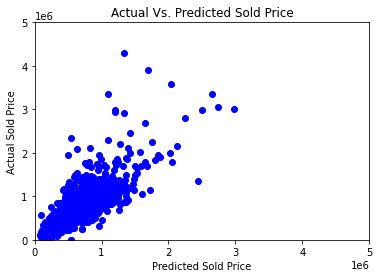

In [31]:
# Create a scatter plot of the actuals vs predicted
print(sc_y.inverse_transform(y))
print(sc_y.inverse_transform(regressor.predict(X)))

plt.scatter(sc_y.inverse_transform(regressor.predict(X)), sc_y.inverse_transform(y), color = 'blue')
plt.title('Actual Vs. Predicted Sold Price')
plt.xlim(0, 5000000)
plt.ylim(0, 5000000)
plt.xlabel('Predicted Sold Price')
plt.ylabel('Actual Sold Price')
plt.show()

(6100,)
(6100,)
[ 650512.25453872  314126.07933187  303780.53550339 ...  622271.06381872
  322160.30943237 1365127.95346773]
6100


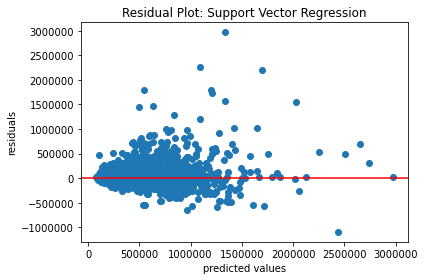

In [32]:
# plot the residuals of the support vector regression model
actualPrices = sc_y.inverse_transform(y) # since we transformed, have to inverse transform for the actual prices
actualPrices2 = np.reshape(actualPrices, (6100,)) # then reshape for plotting purposes
print(actualPrices2.shape)
predictedPrices = np.reshape(sc_y.inverse_transform(regressor.predict(X)), (6100,)) # get the predicted prices
print(predictedPrices.shape)
#print(actualPrices2)
print(predictedPrices)
residuals = []
for item1, item2 in zip(actualPrices2.tolist(), predictedPrices.tolist()): # get residuals as actual - predicted
    residuals.append(item1 - item2)
#rediduals = actualPrices2 - predictedPrices
#print(residuals.shape)
print(len(residuals))
#print(residuals)
plt.scatter(predictedPrices, residuals)
plt.axhline(y=0, color = 'red', label = '0')
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.ticklabel_format(useOffset=False, style='plain')
plt.title('Residual Plot: Support Vector Regression')
plt.xlabel('predicted values')
plt.ylabel('residuals')
plt.tight_layout()
plt.savefig("../Images/svrResiduals.png",bbox_inches='tight')

We can see in the results here that the r squared, plot of actuals vs predicted, and residual plots all look better than we saw in linear regression.  The r squared is higher, the plot of actuals vs predicted is tighter, and the residual plot shows less of a pattern.

In [37]:
# Here I used grid serach CV to find the best parameters for support vector regression of which I used to create
# the final model for support vector regression that is shown above.
grid = {
    "kernel": ["rbf", "poly"],
    "C": [1,10,100,1000],
    "gamma": [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
}

X = X_train.drop('SoldPrice', axis = 1)
y = X_train.SoldPrice
y = np.asarray(y)
y = y.reshape(-1,1)

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

regressor = SVR()

grid_search_cv = GridSearchCV(estimator = regressor, param_grid= grid, cv =5, return_train_score= True, verbose= 2)
grid_search_cv.fit(X, y)
grid_search_cv.cv_results_


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] C=1, gamma=0.0001, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   1.1s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   1.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   1.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   1.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   1.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   1.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.9s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.9s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.9s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   1.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   1.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   1.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   1.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   1.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.9s
[CV] C=1, gamma=0.1, kernel=rbf ......................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   1.2s
[CV] C=1, gamma=0.1, kernel=rbf ......................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   1.3s
[CV] C=1, gamma=0.1, kernel=rbf ......................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   1.2s
[CV] C=1, gamma=0.1, kernel=rbf ......................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   1.2s
[CV] C=1, gamma=0.1, kernel=rbf ......................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   1.7s
[CV] C=100, gamma=0.0001, kernel=rbf .................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   1.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   1.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   1.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   1.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   1.1s
[CV] C=100, gamma=0.001, kernel=rbf ..................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   1.7s
[CV] C=100, gamma=0.001, kernel=rbf ..................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   1.7s
[CV] C=100, gamma=0.001, kernel=rbf ..................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   1.8s
[CV] C=100, gamma=0.001, kernel=rbf ..................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   1.6s
[CV] C=100, gamma=0.001, kernel=rbf ..................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   1.6s
[CV] C=100, gamma=0.01, kernel=rbf ...................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   6.6s
[CV] C=100, gamma=0.01, kernel=rbf ...................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   8.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   5.9s
[CV] C=100, gamma=0.01, kernel=rbf ...................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   7.5s
[CV] C=100, gamma=0.01, kernel=rbf ...................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   6.5s
[CV] C=100, gamma=0.1, kernel=rbf ....................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=  16.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=  16.6s
[CV] C=100, gamma=0.1, kernel=rbf ....................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=  15.5s
[CV] C=100, gamma=0.1, kernel=rbf ....................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=  14.9s
[CV] C=100, gamma=0.1, kernel=rbf ....................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=  16.6s


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  2.9min finished
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


{'mean_fit_time': array([ 0.86426148,  0.81432953,  0.83882594,  1.16781898,  0.93895745,
         1.56718626,  6.72855725, 15.74383364]),
 'std_fit_time': array([0.03434559, 0.00663913, 0.01095269, 0.16173078, 0.0078623 ,
        0.04885209, 0.73826713, 0.6433482 ]),
 'mean_score_time': array([0.13260431, 0.12947631, 0.12468963, 0.16483965, 0.13134422,
        0.12573118, 0.14698262, 0.1753109 ]),
 'std_score_time': array([0.00152036, 0.00047317, 0.00044787, 0.03495199, 0.0015621 ,
        0.00044663, 0.04116803, 0.04457635]),
 'param_C': masked_array(data=[1, 1, 1, 1, 100, 100, 100, 100],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=[0.0001, 0.001, 0.01, 0.1, 0.0001, 0.001, 0.01, 0.1],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'rbf', 'rbf',

In [38]:
# print the results of grid search CV by the highest mean test score of the cross validated trials for the models
pd.DataFrame(grid_search_cv.cv_results_ ).sort_values('mean_test_score', ascending = False).T

,5,6,2,4,1,3,0,7
mean_fit_time,1.56719,6.72856,0.838826,0.938957,0.81433,1.16782,0.864261,15.7438
std_fit_time,0.0488521,0.738267,0.0109527,0.0078623,0.00663913,0.161731,0.0343456,0.643348
mean_score_time,0.125731,0.146983,0.12469,0.131344,0.129476,0.16484,0.132604,0.175311
std_score_time,0.000446628,0.041168,0.000447866,0.0015621,0.00047317,0.034952,0.00152036,0.0445763
param_C,100,100,1,100,1,1,1,100
param_gamma,0.001,0.01,0.01,0.0001,0.001,0.1,0.0001,0.1
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf
params,"{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}"
split0_test_score,0.696985,0.670414,0.669445,0.615172,0.606003,0.603215,0.532743,0.537146
split1_test_score,0.714355,0.705417,0.672081,0.643176,0.61953,0.601324,0.555941,0.536878


In [39]:
# Now for Decision trees

# Function to draw the tree
def draw_tree(estimator, figsize =(15, 5), feature_names = ["Hits", "Years"]):
    """
    Takes a decision  tree estimator and plots it's tree structure
    :param estimator: A sklearn decision tree estimator. Should be fitted.
    :param figsize: tuple. (int, int).
    :param feature_names:
    :return: It returns a plot. The image is not saved.
    """
    fig = plt.figure(figsize= figsize)
    _ = tree.plot_tree(estimator,
                       feature_names= feature_names,
                       filled=True)

In [40]:
# start fresh with the data for the decision tree since it can take qualitative or quantitative data
dfpdForDecisionTree = dfCache.toPandas()

In [41]:
# show the top to ensure it looks correct
dfpdForDecisionTree.head()

,index,MLSNumber,DOM,CDOM,ListDate,AgreementOfSaleSignedLeaseDate,OffMarketDate,SettledDate,OriginalPrice,ListPrice,SoldPrice,StreetNumber,StreetDirection,StreetName,UnitNumber,City,ZipCode,County,Subdivision,ListAgentName,ListAgentCode,ListOfficeName,ListOfficeCode,SellingAgent,SellingAgentCode,SellingOfficeName,SellingOfficeCode,SellerConcessionsAmount,FinalFinancing,FinalShortSale,FinalThirdPartyApproval,FinalBankOwned,TaxAnnualTotal,TaxYear,AcresTotal,LandUseCode,Ownership,SeniorCommunity,CondoCoopAssoc,HOA,OneTimeAssociationFee,AssociationFee,AssociationFeeFrequency,Age,InteriorSqFt,PropertyCondition,Bedrooms,BathsFull,BathsHalf,Design,Style,NumberofStories,FloorNumber,Basement,GarageSpaces,Fireplace,Laundry,OtherRooms,RoomCount,CentralAir,Waterfront,NewConstruction,ModelName,BuyerBrokerCompensation,SubAgentCompensation,TransactionBrokerCompensation,OriginatingMLS,AboveGradeSqFt,BelowGradeSqFt,HomeBuilt,BasementFootprintPct,BasementFinishedPct
0,0,MDBC2022914,0,0,1/14/22,5/10/21 0:00,1/14/22,6/11/21,275000.0,275000,275000,2405.0,None,Stonewall,NaN,Baltimore,21228,BALTIMOREMD,NONE AVAILABLE,Non Member,12345,Non Subscribing Office,NON1,Rachel B Sturm,103717.0,Keller Williams Realty Centre,KWR15,NaN,Conventional,StandardSale,StandardSale,StandardSale,3809.0,2020.0,0.49,10.0,FeeSimple,No,No,No,None,NaN,None,1961.0,2532.0,None,3.0,2.0,NaN,Two,Rancher,Main,None,Yes,NaN,None,None,None,NaN,Yes,No,No,None,2.50,0.00,NaN,BRIGHT,1316.0,1216.0,None,NaN,NaN
1,1,MDBC2021930,0,0,1/7/22,3/25/21 0:00,1/7/22,4/23/21,410000.0,410000,410000,2810.0,None,Wells,NaN,Baltimore,21219,BALTIMOREMD,EDGEMERE/SPARROWS POINT,Non Member,12345,Non Subscribing Office,NON1,Christa R Barkley,25193.0,RE/MAX First Choice,RXFC1,NaN,Conventional,StandardSale,StandardSale,StandardSale,2066.0,2020.0,0.17,10.0,FeeSimple,No,No,No,None,NaN,None,1942.0,1089.0,Excellent,4.0,2.0,NaN,Two,Colonial,Main,None,No,NaN,None,None,None,NaN,Yes,No,Yes,None,2.25,2.25,NaN,BRIGHT,1089.0,0.0,Excellent,NaN,NaN
2,2,MDBC2021520,0,206,1/4/22,1/4/22 0:00,1/4/22,2/26/21,737724.0,737724,737724,607.0,None,Somerstown,NaN,Middle River,21220,BALTIMOREMD,GREENLEIGH AT CROSSROADS,Non Member,12345,Non Subscribing Office,NON1,Charlie Hatter,3090060.0,Monument Sotheby's International Realty,MONUM1,10000.0,Conventional,StandardSale,StandardSale,StandardSale,0.0,2021.0,0.17,NaN,FeeSimple,No,No,Yes,Monthly,105.0,Monthly,2022.0,4254.0,Excellent,5.0,4.0,1.0,Three,Traditional,"Lower1,Main,Upper1",None,Yes,2.0,Yes,"Hookup,UpprFlrLndry",None,NaN,Yes,No,Yes,MOUNT VERNON,2.00,2.00,NaN,BRIGHT,3282.0,972.0,Excellent,NaN,NaN
3,3,MDBC2021428,0,51,1/4/22,3/12/21 0:00,1/4/22,4/27/21,117800.0,117800,117800,1325.0,None,Old Eastern,NaN,Baltimore,21221,BALTIMOREMD,EDGEWOOD PARK,Non Member,12345,Non Subscribing Office,NON1,Adetoun Olunlade,3013617.0,Samson Properties,SAMP16,NaN,Other,BankOwnedREO,BankOwnedREO,BankOwnedREO,2593.0,2020.0,0.17,10.0,FeeSimple,No,No,No,None,NaN,None,1939.0,1453.0,None,4.0,2.0,1.0,Three,CapeCod,"Lower1,Main,Upper1",None,Yes,1.0,None,None,None,NaN,Yes,No,No,None,1.50,0.00,NaN,BRIGHT,1453.0,0.0,None,NaN,NaN
4,4,MDBC2012350,0,68,9/23/21,4/1/21 0:00,9/23/21,5/26/21,1097700.0,1097700,1097700,9.0,None,Crestline,NaN,Owings Mills,21117,BALTIMOREMD,GREENSPRING VALLEY,Non Member,12345,Non Subscribing Office,NON1,Stephen F Edelen,26426.0,"Long & Foster Real Estate, Inc.",LNG106,NaN,Cash,StandardSale,StandardSale,StandardSale,8290.0,2021.0,3.79,10.0,FeeSimple,No,No,No,None,NaN,None,1967.0,3480.0,None,5.0,4.0,1.0,Two,Colonial,"Main,Upper1",None,Yes,3.0,Yes,MainFlrLndry,None,NaN,Yes,No,No,None,2.50,0.00,NaN,BRIGHT,3480.0,0.0,None,NaN,NaN


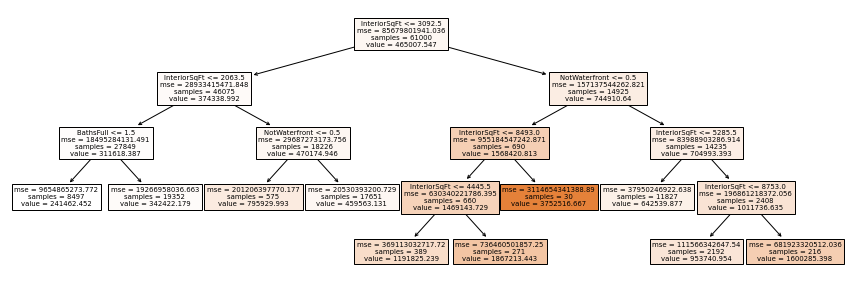

In [42]:
# Create a tree with max leaf nodes being 10 so that it is readable
# for the decision tree, use all the data, and see what the model sees as minimizing loss for the splits

#X = dfpdForDecisionTree.drop(['index', 'MLSNumber', 'DOM', 'CDOM', 'AgreementOfSaleSignedLeaseDate', 'OriginalPrice', 'ListPrice', 'UnitNumber', 'ListAgentName', 'ListAgentCode', 'ListOfficeName', 'ListOfficeCode','SellingAgent', 'SellingAgentCode', 'SellingOfficeName', 'SellingOfficeCode', 'SellerConcessionsAmount', 'LandUseCode', 'Ownership', 'BasementFootprintPct', 'BasementFinishedPct', 'OriginatingMLS'], axis=1)
X = dfpdForLinearRegression.drop(['SoldPrice'], axis=1)
y = dfpdForLinearRegression['SoldPrice']
#y = dfpdForDecisionTree['SoldPrice']
#print(X.head(2))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

regressor = DecisionTreeRegressor(max_leaf_nodes= 10)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

#print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))

draw_tree(regressor,feature_names= X_train.columns)


In [43]:
#Grid Search CV
#now lets try to find the best parameters for decision trees
#this takes a pretty long time to run, so gave faster option below the commented out grid
dt = DecisionTreeRegressor(max_leaf_nodes= 300)
#grid = {'n_estimators': [50,300,500,700], 'max_leaf_nodes': [5, 15, 25, 100], 'ccp_alpha': [0, 0.01, 0.1, 1, 10], 'criterion' : ['gini', 'entropy'], "min_impurity_split":[0,0.1,0.3,0.5], "n_jobs": [4]}
grid = {'max_depth': [15, 100], 'ccp_alpha': [0, 0.1], "min_impurity_decrease":[0,0.1,0.5]}
grid_search_cv = GridSearchCV(estimator = dt, param_grid= grid, cv =5, return_train_score= True, verbose= 2)
grid_search_cv.fit(X_train, y_train)
grid_search_cv.cv_results_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] ccp_alpha=0, max_depth=15, min_impurity_decrease=0 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ccp_alpha=0, max_depth=15, min_impurity_decrease=0, total=   6.2s
[CV] ccp_alpha=0, max_depth=15, min_impurity_decrease=0 ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.5s remaining:    0.0s


[CV]  ccp_alpha=0, max_depth=15, min_impurity_decrease=0, total=   6.4s
[CV] ccp_alpha=0, max_depth=15, min_impurity_decrease=0 ..............
[CV]  ccp_alpha=0, max_depth=15, min_impurity_decrease=0, total=   3.2s
[CV] ccp_alpha=0, max_depth=15, min_impurity_decrease=0 ..............
[CV]  ccp_alpha=0, max_depth=15, min_impurity_decrease=0, total=   5.7s
[CV] ccp_alpha=0, max_depth=15, min_impurity_decrease=0 ..............
[CV]  ccp_alpha=0, max_depth=15, min_impurity_decrease=0, total=   7.5s
[CV] ccp_alpha=0, max_depth=15, min_impurity_decrease=0.1 ............
[CV]  ccp_alpha=0, max_depth=15, min_impurity_decrease=0.1, total=   3.3s
[CV] ccp_alpha=0, max_depth=15, min_impurity_decrease=0.1 ............
[CV]  ccp_alpha=0, max_depth=15, min_impurity_decrease=0.1, total=   3.2s
[CV] ccp_alpha=0, max_depth=15, min_impurity_decrease=0.1 ............
[CV]  ccp_alpha=0, max_depth=15, min_impurity_decrease=0.1, total=   3.1s
[CV] ccp_alpha=0, max_depth=15, min_impurity_decrease=0.1 ......

[CV]  ccp_alpha=0.1, max_depth=100, min_impurity_decrease=0.5, total=   3.8s
[CV] ccp_alpha=0.1, max_depth=100, min_impurity_decrease=0.5 .........
[CV]  ccp_alpha=0.1, max_depth=100, min_impurity_decrease=0.5, total=   3.9s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  4.1min finished


{'mean_fit_time': array([5.70356212, 3.20170259, 3.20548558, 3.86007123, 3.60991278,
        3.97171717, 4.07119002, 3.38094993, 3.23557758, 3.9417943 ,
        3.36776099, 3.47723422]),
 'std_fit_time': array([1.43455605, 0.07893557, 0.02313379, 1.04065901, 0.30629725,
        0.60195838, 0.54869302, 0.13955423, 0.0518188 , 0.57304403,
        0.12403709, 0.25756767]),
 'mean_score_time': array([0.0805831 , 0.0519701 , 0.0633162 , 0.07851443, 0.05698519,
        0.05764923, 0.06269398, 0.05460358, 0.05257268, 0.06155677,
        0.05339622, 0.05615158]),
 'std_score_time': array([0.02746447, 0.00092432, 0.02344086, 0.04848395, 0.00763674,
        0.00525132, 0.01249063, 0.00199512, 0.00071506, 0.01073488,
        0.00120678, 0.00426532]),
 'param_ccp_alpha': masked_array(data=[0, 0, 0, 0, 0, 0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             

In [108]:
# print the results of the grid search
pd.DataFrame(grid_search_cv.cv_results_ ).sort_values('mean_test_score', ascending = False).T

,0,7,11,5,2,3,6,9,1,4,8,10
mean_fit_time,3.37432,3.93824,4.88551,3.44463,3.25712,3.16291,4.19138,3.78647,3.14749,3.21339,3.89958,4.20914
std_fit_time,0.177248,0.52203,1.35411,0.429552,0.1452,0.0336158,0.338928,0.63343,0.0260389,0.0802968,0.828026,0.771287
mean_score_time,0.0605515,0.0594967,0.0740457,0.0533535,0.0525778,0.0521739,0.0695582,0.0531126,0.0519485,0.0530675,0.0629024,0.0819744
std_score_time,0.0132901,0.00758964,0.0184977,0.000546459,0.00145225,0.000384273,0.0208852,0.000813958,0.000696951,0.000415007,0.0172471,0.0430713
param_ccp_alpha,0,0.1,0.1,0,0,0,0.1,0.1,0,0,0.1,0.1
param_max_depth,15,15,100,100,15,100,15,100,15,100,15,100
param_min_impurity_decrease,0,0.1,0.5,0.5,0.5,0,0,0,0.1,0.1,0.5,0.1
params,"{'ccp_alpha': 0, 'max_depth': 15, 'min_impurit...","{'ccp_alpha': 0.1, 'max_depth': 15, 'min_impur...","{'ccp_alpha': 0.1, 'max_depth': 100, 'min_impu...","{'ccp_alpha': 0, 'max_depth': 100, 'min_impuri...","{'ccp_alpha': 0, 'max_depth': 15, 'min_impurit...","{'ccp_alpha': 0, 'max_depth': 100, 'min_impuri...","{'ccp_alpha': 0.1, 'max_depth': 15, 'min_impur...","{'ccp_alpha': 0.1, 'max_depth': 100, 'min_impu...","{'ccp_alpha': 0, 'max_depth': 15, 'min_impurit...","{'ccp_alpha': 0, 'max_depth': 100, 'min_impuri...","{'ccp_alpha': 0.1, 'max_depth': 15, 'min_impur...","{'ccp_alpha': 0.1, 'max_depth': 100, 'min_impu..."
split0_test_score,0.715304,0.688733,0.685934,0.703497,0.658905,0.672128,0.656501,0.668366,0.708939,0.665498,0.678549,0.689284
split1_test_score,0.595963,0.590067,0.597946,0.603472,0.601762,0.562949,0.633817,0.642997,0.647486,0.59331,0.601104,0.592858


In [103]:
# calculate the r squared value for the decision tree
r2_score(y_test, y_pred)

0.6206040820079577

The decision tree is good for seeing if there are any features of the model that turned out to be important that we weren't expecting.  By using all of the data, if the list agent or some feature like that was important and split on, this would tell us.  It seems the features split on though were in line with what we expected based on the correlation matrix and linear regression results; so nothing unusual.  The decision tree as a predictor is not the best in this case since it isn't continuous, but got the job done in terms of the application and telling us that we are capturing the most important variables in the data we are using for the other models.

In [182]:
# Now to try with XGBoost

sample = dfpdForLinearRegressionNoStyle.sample(frac=0.1, replace=False, random_state=1)
X = sample.drop(['SoldPrice'], axis=1)
y = sample['SoldPrice']
#y = dfpdForDecisionTree['SoldPrice']
#print(X.head(2))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

# define model
model = XGBRegressor()
# fit model
model.fit(X, y)
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)
#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
#scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)

#print(scores.mean())
#print(scores.std())


0.9760031281415894

In [161]:
# Since this model deemed the best, save it off as the finalized model
filename = '../Models/finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [155]:
X_test.head()

,SettledDate,ZipCode,AcresTotal,Age,InteriorSqFt,Bedrooms,BathsFull,BathsHalf,GarageSpaces,ANNEARUNDELMD,BALTIMOREMD,HARFORDMD,HOWARDMD,NoBasement,HasBasement,NoFireplace,HasFireplace,NoCentralAir,HasCentralAir,NotWaterfront,IsWaterfront,NotNewConstruction,IsNewConstruction
63484,736653,21009,0.38,1993.0,3172.0,4.0,3.0,1.0,2.0,0,0,1,0,0,1,1,0,0,1,1,0,1,0
13321,737502,21032,0.31,1987.0,909.0,2.0,1.0,0.0,0.0,1,0,0,0,1,0,1,0,0,1,0,1,1,0
69463,738195,21154,9.44,1981.0,2540.0,4.0,3.0,0.0,2.0,0,0,1,0,0,1,0,1,0,1,1,0,1,0
27823,737090,21409,0.25,2018.0,2996.0,4.0,2.0,1.0,2.0,1,0,0,0,0,1,0,1,0,1,1,0,0,1
6494,737347,21114,0.19,1994.0,2308.0,4.0,2.0,1.0,2.0,1,0,0,0,0,1,0,1,0,1,1,0,1,0


(1525,)
(1525,)
[361896.78 522698.5  591435.75 ... 449284.78 676837.   670505.75]
1525


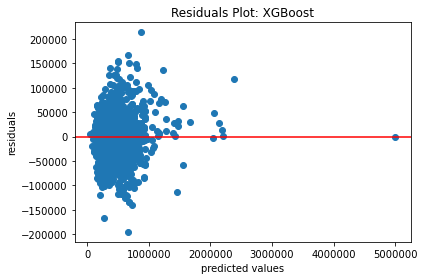

In [184]:
# Plot the residuals for XGBoost
actualPrices = y_test
predictedPrices = y_pred
print(predictedPrices)
residuals = []
for item1, item2 in zip(actualPrices.tolist(), predictedPrices.tolist()):
    residuals.append(item1 - item2)
#rediduals = actualPrices - predictedPrices
#print(residuals.shape)
print(len(residuals))
#print(residuals)
plt.scatter(predictedPrices, residuals)
plt.axhline(y=0, color = 'red', label = '0')
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('predicted values')
plt.ylabel('residuals')
plt.title('Residuals Plot: XGBoost')
plt.tight_layout()
plt.savefig("../Images/xgBoostResiduals.png",bbox_inches='tight')

XGBoost performed the best as a model by far.  It achieved a r squared of 0,.976 and its residuals plot looks much better with little pattern and things predicted correctly within 50-100k for the most part, much closer than we saw with the other models being within 500k.

In [124]:
#Grid Search CV used to find the optimal XGBoost model
sample = dfpdForLinearRegression.sample(frac=0.01, replace=False, random_state=1) # use sample for speed
X = sample.drop(['SoldPrice'], axis=1)
y = sample['SoldPrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

model = XGBRegressor()
grid = {'booster': ['gbtree', 'gblinear', 'dart'], 'eta': [0.1, 0.3, 0.5], "max_depth":[3, 6, 9]}
grid_search_cv = GridSearchCV(estimator = model, param_grid= grid, cv =5, return_train_score= True, verbose= 2)
grid_search_cv.fit(X_train, y_train)
grid_search_cv.cv_results_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] booster=gbtree, eta=0.1, max_depth=3 ............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............. booster=gbtree, eta=0.1, max_depth=3, total=   1.5s
[CV] booster=gbtree, eta=0.1, max_depth=3 ............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] ............. booster=gbtree, eta=0.1, max_depth=3, total=   1.7s
[CV] booster=gbtree, eta=0.1, max_depth=3 ............................
[CV] ............. booster=gbtree, eta=0.1, max_depth=3, total=   1.3s
[CV] booster=gbtree, eta=0.1, max_depth=3 ............................
[CV] ............. booster=gbtree, eta=0.1, max_depth=3, total=   1.6s
[CV] booster=gbtree, eta=0.1, max_depth=3 ............................
[CV] ............. booster=gbtree, eta=0.1, max_depth=3, total=   2.9s
[CV] booster=gbtree, eta=0.1, max_depth=6 ............................
[CV] ............. booster=gbtree, eta=0.1, max_depth=6, total=   3.2s
[CV] booster=gbtree, eta=0.1, max_depth=6 ............................
[CV] ............. booster=gbtree, eta=0.1, max_depth=6, total=   3.5s
[CV] booster=gbtree, eta=0.1, max_depth=6 ............................
[CV] ............. booster=gbtree, eta=0.1, max_depth=6, total=   3.2s
[CV] booster=gbtree, eta=0.1, max_depth=6 ............................
[CV] .

[CV] ........... booster=gblinear, eta=0.1, max_depth=3, total=   0.5s
[CV] booster=gblinear, eta=0.1, max_depth=3 ..........................
[21:57:08] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] ........... booster=gblinear, eta=0.1, max_depth=3, total=   0.5s
[CV] booster=gblinear, eta=0.1, max_depth=6 ..........................
[21:57:08] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings 

[CV] ........... booster=gblinear, eta=0.3, max_depth=3, total=   0.5s
[CV] booster=gblinear, eta=0.3, max_depth=3 ..........................
[21:57:16] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] ........... booster=gblinear, eta=0.3, max_depth=3, total=   0.5s
[CV] booster=gblinear, eta=0.3, max_depth=3 ..........................
[21:57:16] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings 

[CV] ........... booster=gblinear, eta=0.5, max_depth=3, total=   0.5s
[CV] booster=gblinear, eta=0.5, max_depth=3 ..........................
[21:57:24] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] ........... booster=gblinear, eta=0.5, max_depth=3, total=   0.6s
[CV] booster=gblinear, eta=0.5, max_depth=3 ..........................
[21:57:25] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings 

[CV] ............... booster=dart, eta=0.1, max_depth=3, total=   6.3s
[CV] booster=dart, eta=0.1, max_depth=3 ..............................
[CV] ............... booster=dart, eta=0.1, max_depth=3, total=   6.9s
[CV] booster=dart, eta=0.1, max_depth=6 ..............................
[CV] ............... booster=dart, eta=0.1, max_depth=6, total=   9.4s
[CV] booster=dart, eta=0.1, max_depth=6 ..............................
[CV] ............... booster=dart, eta=0.1, max_depth=6, total=   5.6s
[CV] booster=dart, eta=0.1, max_depth=6 ..............................
[CV] ............... booster=dart, eta=0.1, max_depth=6, total=   5.5s
[CV] booster=dart, eta=0.1, max_depth=6 ..............................
[CV] ............... booster=dart, eta=0.1, max_depth=6, total=   5.6s
[CV] booster=dart, eta=0.1, max_depth=6 ..............................
[CV] ............... booster=dart, eta=0.1, max_depth=6, total=   5.6s
[CV] booster=dart, eta=0.1, max_depth=9 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:  7.4min finished


{'mean_fit_time': array([1.77927341, 3.05423899, 5.21527419, 2.37384133, 2.2018405 ,
        2.33740382, 1.082091  , 1.69360714, 3.42852726, 0.43018994,
        0.48235688, 0.50257535, 0.485712  , 0.49552336, 0.49381409,
        0.50098324, 0.5009923 , 0.52896886, 5.04808798, 6.01168261,
        6.12181668, 4.50238037, 6.7622592 , 5.75355191, 4.38592463,
        4.93230348, 5.71629071]),
 'std_fit_time': array([0.57896674, 0.52373237, 1.30252747, 0.47341682, 0.62709308,
        0.17527939, 0.04924335, 0.09343235, 1.38746154, 0.04073115,
        0.01986129, 0.00773961, 0.01560711, 0.00834877, 0.00759194,
        0.00678189, 0.00539736, 0.05161715, 0.84851709, 1.53461208,
        0.45277657, 0.08735878, 1.47166189, 0.19213958, 0.04913504,
        0.07949223, 0.14810061]),
 'mean_score_time': array([0.0372282 , 0.04096465, 0.04461837, 0.04605217, 0.03176513,
        0.0325922 , 0.03271575, 0.03081164, 0.03277693, 0.03729005,
        0.04076753, 0.04141335, 0.03635058, 0.03742127, 0.039691

In [125]:
pd.DataFrame(grid_search_cv.cv_results_ ).sort_values('mean_test_score', ascending = False).T

,0,18,24,6,3,21,12,14,13,16,15,17,9,11,10,4,22,25,7,1,19,26,8,5,23,20,2
mean_fit_time,1.77927,5.04809,4.38592,1.08209,2.37384,4.50238,0.485712,0.493814,0.495523,0.500992,0.500983,0.528969,0.43019,0.502575,0.482357,2.20184,6.76226,4.9323,1.69361,3.05424,6.01168,5.71629,3.42853,2.3374,5.75355,6.12182,5.21527
std_fit_time,0.578967,0.848517,0.049135,0.0492433,0.473417,0.0873588,0.0156071,0.00759194,0.00834877,0.00539736,0.00678189,0.0516172,0.0407312,0.00773961,0.0198613,0.627093,1.47166,0.0794922,0.0934324,0.523732,1.53461,0.148101,1.38746,0.175279,0.19214,0.452777,1.30253
mean_score_time,0.0372282,0.389202,0.296276,0.0327157,0.0460522,0.314742,0.0363506,0.0396918,0.0374213,0.0422152,0.0403194,0.0389235,0.03729,0.0414134,0.0407675,0.0317651,0.468136,0.285482,0.0308116,0.0409647,0.332416,0.284697,0.0327769,0.0325922,0.288041,0.326501,0.0446184
std_score_time,0.0107762,0.184764,0.0109961,0.0040801,0.00523978,0.0122553,0.00562707,0.00688606,0.00548295,0.00589135,0.00477391,0.0060827,0.00309194,0.00247902,0.0058371,0.0054471,0.12183,0.01865,0.00431828,0.00668034,0.0129538,0.0181049,0.00720121,0.00522442,0.010243,0.00232989,0.0073479
param_booster,gbtree,dart,dart,gbtree,gbtree,dart,gblinear,gblinear,gblinear,gblinear,gblinear,gblinear,gblinear,gblinear,gblinear,gbtree,dart,dart,gbtree,gbtree,dart,dart,gbtree,gbtree,dart,dart,gbtree
param_eta,0.1,0.1,0.5,0.5,0.3,0.3,0.3,0.3,0.3,0.5,0.5,0.5,0.1,0.1,0.1,0.3,0.3,0.5,0.5,0.1,0.1,0.5,0.5,0.3,0.3,0.1,0.1
param_max_depth,3,3,3,3,3,3,3,9,6,6,3,9,3,9,6,6,6,6,6,6,6,9,9,9,9,9,9
params,"{'booster': 'gbtree', 'eta': 0.1, 'max_depth': 3}","{'booster': 'dart', 'eta': 0.1, 'max_depth': 3}","{'booster': 'dart', 'eta': 0.5, 'max_depth': 3}","{'booster': 'gbtree', 'eta': 0.5, 'max_depth': 3}","{'booster': 'gbtree', 'eta': 0.3, 'max_depth': 3}","{'booster': 'dart', 'eta': 0.3, 'max_depth': 3}","{'booster': 'gblinear', 'eta': 0.3, 'max_depth...","{'booster': 'gblinear', 'eta': 0.3, 'max_depth...","{'booster': 'gblinear', 'eta': 0.3, 'max_depth...","{'booster': 'gblinear', 'eta': 0.5, 'max_depth...","{'booster': 'gblinear', 'eta': 0.5, 'max_depth...","{'booster': 'gblinear', 'eta': 0.5, 'max_depth...","{'booster': 'gblinear', 'eta': 0.1, 'max_depth...","{'booster': 'gblinear', 'eta': 0.1, 'max_depth...","{'booster': 'gblinear', 'eta': 0.1, 'max_depth...","{'booster': 'gbtree', 'eta': 0.3, 'max_depth': 6}","{'booster': 'dart', 'eta': 0.3, 'max_depth': 6}","{'booster': 'dart', 'eta': 0.5, 'max_depth': 6}","{'booster': 'gbtree', 'eta': 0.5, 'max_depth': 6}","{'booster': 'gbtree', 'eta': 0.1, 'max_depth': 6}","{'booster': 'dart', 'eta': 0.1, 'max_depth': 6}","{'booster': 'dart', 'eta': 0.5, 'max_depth': 9}","{'booster': 'gbtree', 'eta': 0.5, 'max_depth': 9}","{'booster': 'gbtree', 'eta': 0.3, 'max_depth': 9}","{'booster': 'dart', 'eta': 0.3, 'max_depth': 9}","{'booster': 'dart', 'eta': 0.1, 'max_depth': 9}","{'booster': 'gbtree', 'eta': 0.1, 'max_depth': 9}"
split0_test_score,0.718617,0.718617,0.801172,0.801172,0.740014,0.740014,0.66273,0.662761,0.662762,0.668291,0.668293,0.668298,0.627935,0.62805,0.62805,0.636736,0.636736,0.60935,0.60935,0.595881,0.595881,0.573475,0.573475,0.529732,0.529732,0.584384,0.584384
split1_test_score,0.705616,0.705616,0.636005,0.636005,0.657364,0.657364,0.61936,0.619295,0.619351,0.619093,0.619081,0.619061,0.619431,0.619366,0.619364,0.584836,0.584836,0.508442,0.508442,0.625855,0.625855,0.560553,0.560553,0.587855,0.587855,0.601401,0.601401
